In [1]:
all_images_dir = 'src_data/dog_cat_img_dataset/train'

In [2]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk(all_images_dir))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [3]:
import random

file_names = os.listdir(all_images_dir)
random_samples = random.sample(file_names, k=10)  # Change k to the number of samples you want
print(random_samples)


['dog.1829.jpg', 'cat.6457.jpg', 'dog.8568.jpg', 'dog.12113.jpg', 'dog.8925.jpg', 'dog.1028.jpg', 'cat.11725.jpg', 'cat.6142.jpg', 'dog.10378.jpg', 'dog.12116.jpg']


In [4]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#from google.colab.patches import cv2_imshow

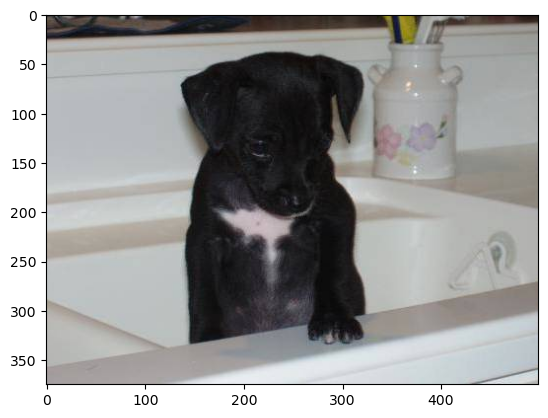

In [5]:

# display dog image
img = mpimg.imread(all_images_dir+'/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

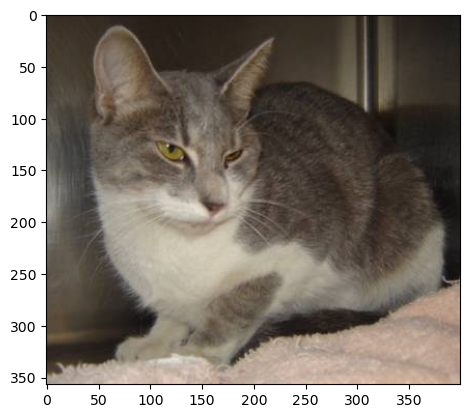

In [6]:
# display cat image
img = mpimg.imread(all_images_dir+'/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [7]:
file_names = os.listdir(all_images_dir)

for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
cat
cat
cat


In [8]:
file_names = os.listdir(all_images_dir)
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1
print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12501


In [10]:
# Create a directory for resized images
os.makedirs(os.path.join(all_images_dir, 'image_resized'))

# Set full permissions for the directory
directory_path = os.path.join(all_images_dir, 'image_resized')
os.chmod(directory_path, 0o777)

In [11]:
original_folder = all_images_dir+'/'
resized_folder = str(all_images_dir+'/image_resized/')
print(original_folder, resized_folder)

# Get a list of file names in the original folder
file_names = os.listdir(original_folder)
# Randomly select 2000 indices
random_indices = random.sample(range(len(file_names)), k=2000)

for i in random_indices:
  filename = file_names[i]
  img_path = original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')
  newImgPath = resized_folder+filename
  img.save(newImgPath)

src_data/dog_cat_img_dataset/train/ src_data/dog_cat_img_dataset/train/image_resized/


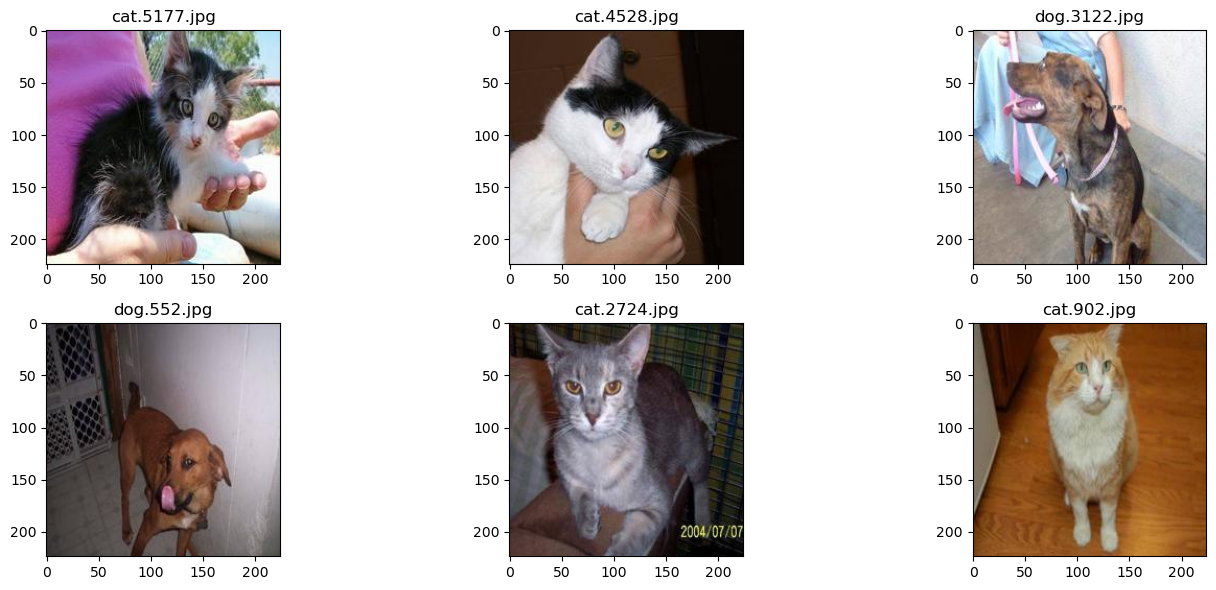

In [14]:

# Get a list of file names in the resized folder
file_names = os.listdir(resized_folder)
# Randomly select 5 file names
random_samples = random.sample(file_names, k=6)
# Create a figure and set the size
fig = plt.figure(figsize=(15, 6))
# Loop through the random samples and display them in a tiled manner
for i, file_name in enumerate(random_samples):
    # Read the image
    img = mpimg.imread(os.path.join(resized_folder, file_name))    
    # Add a subplot
    ax = fig.add_subplot(2, 3, i+1)  # 2 rows, 3 columns, ith position    
    # Display the image
    ax.imshow(img)    
    # Set title (optional)
    ax.set_title(file_name)    
    # Hide axes (optional)
    ax.axis('on')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
# creaing a for loop to assign labels
filenames = os.listdir(resized_folder)
labels = []
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [16]:
print(filenames[0:5])
print(len(filenames))

['cat.10002.jpg', 'cat.10015.jpg', 'cat.10048.jpg', 'cat.10052.jpg', 'cat.10054.jpg']
2000


In [17]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [18]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1007  993]


In [20]:
import cv2
import glob

In [21]:
image_directory = resized_folder
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [22]:
print(dog_cat_images)

[[[[ 54  59  57]
   [ 55  60  58]
   [ 56  61  59]
   ...
   [ 57  69  73]
   [ 57  69  73]
   [ 57  69  73]]

  [[ 54  59  57]
   [ 55  60  58]
   [ 56  61  59]
   ...
   [ 57  69  73]
   [ 57  69  73]
   [ 57  69  73]]

  [[ 55  60  58]
   [ 56  61  59]
   [ 57  62  60]
   ...
   [ 57  69  73]
   [ 57  69  73]
   [ 57  69  73]]

  ...

  [[ 42  53  61]
   [ 42  53  61]
   [ 42  53  61]
   ...
   [ 26  34  41]
   [ 18  26  33]
   [ 12  20  27]]

  [[ 42  53  61]
   [ 42  53  61]
   [ 42  53  61]
   ...
   [ 24  32  39]
   [ 16  24  31]
   [ 10  18  25]]

  [[ 42  53  61]
   [ 42  53  61]
   [ 42  53  61]
   ...
   [ 24  32  39]
   [ 16  24  31]
   [ 10  18  25]]]


 [[[245 235 235]
   [247 237 237]
   [248 240 240]
   ...
   [ 83  76  81]
   [ 79  71  78]
   [ 76  68  75]]

  [[246 236 236]
   [247 237 237]
   [247 239 239]
   ...
   [ 83  76  81]
   [ 79  71  78]
   [ 76  68  75]]

  [[247 237 237]
   [247 237 237]
   [248 238 238]
   ...
   [ 83  76  81]
   [ 79  71  78]
   [ 75  67

In [23]:

type(dog_cat_images)

numpy.ndarray

In [24]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [25]:
X = dog_cat_images
Y = np.asarray(labels)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [28]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [29]:

print(X_train_scaled)

[[[[0.65098039 0.62352941 0.70588235]
   [0.83137255 0.80392157 0.88627451]
   [0.87843137 0.85098039 0.93333333]
   ...
   [0.87843137 0.84313725 0.94509804]
   [0.8745098  0.83921569 0.94117647]
   [0.90588235 0.87058824 0.97254902]]

  [[0.62352941 0.59607843 0.67843137]
   [0.80392157 0.77647059 0.85882353]
   [0.85490196 0.82745098 0.90980392]
   ...
   [0.84705882 0.81176471 0.91372549]
   [0.84705882 0.81176471 0.91372549]
   [0.89411765 0.85882353 0.96078431]]

  [[0.60392157 0.57647059 0.65882353]
   [0.78431373 0.75686275 0.83921569]
   [0.83921569 0.81176471 0.89411765]
   ...
   [0.84313725 0.81176471 0.90196078]
   [0.85882353 0.82745098 0.91764706]
   [0.9254902  0.89411765 0.98431373]]

  ...

  [[0.61568627 0.57254902 0.6745098 ]
   [0.80392157 0.76078431 0.8627451 ]
   [0.8627451  0.81960784 0.92156863]
   ...
   [0.8627451  0.82352941 0.91372549]
   [0.8745098  0.83137255 0.93333333]
   [0.89411765 0.85098039 0.95294118]]

  [[0.61176471 0.57647059 0.68235294]
   [0.8

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

In [33]:
# Check available devices
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) == 0:
    print("No GPU devices available, using CPU.")
    tf.config.set_visible_devices([], 'GPU')  # Hide GPUs
else:
    print("Available GPU devices:")
    for device in physical_devices:
        print(device)
    # Use GPU
    tf.config.experimental.set_visible_devices(physical_devices[0], 'GPU')
    print("Using GPU.")

Available GPU devices:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Using GPU.


In [32]:

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [34]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [35]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [36]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 5s 28ms/step - loss: 0.2112 - acc: 0.9100
Epoch 2/5
50/50 [==============================] - 1s 25ms/step - loss: 0.0729 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 1s 24ms/step - loss: 0.0544 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 1s 25ms/step - loss: 0.0443 - acc: 0.9850
Epoch 5/5
50/50 [==============================] - 1s 24ms/step - loss: 0.0368 - acc: 0.9906


In [37]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 1s 25ms/step - loss: 0.0533 - acc: 0.9800
Test Loss = 0.05327589064836502
Test Accuracy = 0.9800000190734863


In [39]:
'src_data/dog_cat_img_dataset/to_be_predicted/dog_predicted.jpg'

'src_data/dog_cat_img_dataset/to_be_predicted/dog_predicted.jpg'

In [44]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
# Display the input image
cv2.imshow('Input Image', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Path of the image to be predicted:  src_data/dog_cat_img_dataset/to_be_predicted/dog_predicted.jpg


In [45]:
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
  print('The image represents a Cat')
else:
  print('The image represents a Dog')

1/1 [==============================] - 0s 338ms/step
[[-2.1504447  4.7965627]]
1
The image represents a Dog


In [47]:
import cv2
import numpy as np

def predict_image(input_image_path, model):
    # Read the input image
    input_image = cv2.imread(input_image_path)
    # Display the input image
    cv2.imshow('Input Image', input_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # Resize and scale the input image
    input_image_resize = cv2.resize(input_image, (224,224))
    input_image_scaled = input_image_resize / 255
    image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
    # Make predictions
    input_prediction = model.predict(image_reshaped)
    print(input_prediction)
    # Get the predicted label
    input_pred_label = np.argmax(input_prediction)
    print(input_pred_label)
    # Print the prediction result
    if input_pred_label == 0:
        print('The image represents a Cat')
    else:
        print('The image represents a Dog')




In [48]:
# Example usage
input_image_path = input('Path of the image to be predicted: ')
# Assuming 'model' is your pre-trained model
predict_image(input_image_path, model)

Path of the image to be predicted:  src_data/dog_cat_img_dataset/to_be_predicted/dog_predicted.jpg


1/1 [==============================] - 0s 18ms/step
[[-2.1504447  4.7965627]]
1
The image represents a Dog


In [49]:
# Example usage
input_image_path = input('Path of the image to be predicted: ')
# Assuming 'model' is your pre-trained model
predict_image(input_image_path, model)

Path of the image to be predicted:  src_data/dog_cat_img_dataset/to_be_predicted/cat_predicted.jpg


1/1 [==============================] - 0s 18ms/step
[[ 4.4542146 -4.0761037]]
0
The image represents a Cat
